### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [1]:
import resource
def using(point=""):
    usage=resource.getrusage(resource.RUSAGE_SELF)
    return '''%s: usertime=%s systime=%s mem=%s mb
           '''%(point,usage[0],usage[1],
                (usage[2]*resource.getpagesize())/1000000.0 )

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv("../data/train_data3.csv")
df_test = pd.read_csv("../data/test_data3.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]
using("start")

'start: usertime=22.26 systime=2.184 mem=21182.152704 mb\n           '

### Analisando quantidade de registro por usuário

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    19918.000000
mean       379.496787
std        508.267045
min          1.000000
25%         66.000000
50%        197.000000
75%        495.000000
max       6317.000000
Name: user_id, dtype: float64

(array([  1.61650000e+04,   2.60900000e+03,   7.13000000e+02,
          2.60000000e+02,   9.50000000e+01,   3.80000000e+01,
          2.10000000e+01,   8.00000000e+00,   6.00000000e+00,
          3.00000000e+00]),
 array([  1.00000000e+00,   6.32600000e+02,   1.26420000e+03,
          1.89580000e+03,   2.52740000e+03,   3.15900000e+03,
          3.79060000e+03,   4.42220000e+03,   5.05380000e+03,
          5.68540000e+03,   6.31700000e+03]),
 <a list of 10 Patch objects>)

/home/ubuntu/anaconda3/envs/ml/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


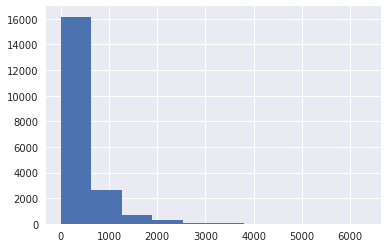

In [5]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [6]:
user_for_general_model = register_count[(register_count <= 100)].index
user_for_specific_model = register_count[(register_count > 100)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

6696
13222


In [7]:
### select users for specific
#df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
#df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
df_train.columns

Index([u'Unnamed: 0', u'genre_id', u'ts_listen', u'media_id', u'album_id',
       u'context_type', u'release_date', u'platform_name', u'platform_family',
       u'media_duration', u'listen_type', u'user_gender', u'user_id',
       u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [8]:
to_drop = ['Unnamed: 0']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2,16.580822,7
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2,19.241096,7
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2,26.646575,8
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2,13.915068,6
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1,15.271233,7


In [9]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2,16.580822,7
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2,19.241096,7
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2,26.646575,8
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2,13.915068,6
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1,15.271233,7


In [10]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [11]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [12]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [13]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow'], dtype=object)

In [14]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

In [15]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,2004,3,0,2,16.580822,7,41,48,57,71
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,2009,3,0,2,21.868493,7,41,48,57,71
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,2002,2,0,2,14.879452,7,41,48,57,71
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,2002,3,0,2,14.876712,7,41,48,57,71
4,10,2016-11-29 09:42:52,983248,109347,1,2002-10-21 00:00:00,1,0,3.0,1,...,2002,1,0,2,14.882192,7,41,48,57,71


### Check for NA
#### Ver depois sobre o user_age_group!

In [16]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [17]:
# df_train.dropna(inplace=True)

In [18]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [19]:
y = df_train["is_listened"].values

In [20]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [21]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 2922
media_id: 452965
album_id: 151464
context_type: 74
release_date: 8901
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 19918
artist_id: 67135
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [22]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [23]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [24]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
#                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [25]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [26]:
te.fit(df_train)

In [27]:
te.transform(df_train)
te.transform(df_test)
del te

In [28]:
print("das")

das


In [29]:
print("teste")

teste


In [30]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [31]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

In [32]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [33]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow
0,0.688147,2016-12-01 11:00:15,0.000000,41774,0.695604,2004-07-04 00:00:00,1,0,4.0,0.721113,...,2004,3,0,2,16.580822,2,41,48,57,71
1,0.663153,2016-12-01 10:48:50,0.736878,400118,0.758048,2009-10-16 00:00:00,1,0,7.0,0.721113,...,2009,3,0,2,21.868493,2,41,48,57,71
2,0.724500,2016-11-30 11:48:22,0.631609,109347,0.688531,2002-10-21 00:00:00,1,0,3.0,0.721113,...,2002,2,0,2,14.879452,2,41,48,57,71
3,0.724500,2016-12-01 07:18:24,0.631609,109347,0.688531,2002-10-21 00:00:00,1,0,3.0,0.721113,...,2002,3,0,2,14.876712,2,41,48,57,71
4,0.724500,2016-11-29 09:42:52,0.631609,109347,0.573605,2002-10-21 00:00:00,1,0,3.0,0.600282,...,2002,1,0,2,14.882192,2,41,48,57,71


In [34]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [35]:
print(df_train.head())

   genre_id            ts_listen  media_id  album_id  context_type         release_date  media_duration  listen_type   user_id  artist_id            ...              user_age_group_2  \
0  0.688147  2016-12-01 11:00:15  0.000000     41774      0.695604  2004-07-04 00:00:00             4.0     0.721113  0.676991      56514            ...                             1   
1  0.663153  2016-12-01 10:48:50  0.736878    400118      0.758048  2009-10-16 00:00:00             7.0     0.721113  0.676991        599            ...                             1   
2  0.724500  2016-11-30 11:48:22  0.631609    109347      0.688531  2002-10-21 00:00:00             3.0     0.721113  0.676991         66            ...                             1   
3  0.724500  2016-12-01 07:18:24  0.631609    109347      0.688531  2002-10-21 00:00:00             3.0     0.721113  0.676991         66            ...                             1   
4  0.724500  2016-11-29 09:42:52  0.631609    109347      0.573605  20

In [36]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [37]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'listen_type', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'platform_name_1', 'platform_name_2', 'platform_family_1',
       'platform_family_2', 'user_gender_1', 'user_age_group_1',
       'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1',
       'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3',
       'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5',
       'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1',
       'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3'], dtype=object)

In [38]:
%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [39]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [40]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

### Feature Selection

In [43]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

32 selected variables from 35, 91.43%
['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age', 'media_decade', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [44]:
features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [45]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [46]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [47]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
# confusion_matrix(y_test, model.predict(X_test))

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.77935378802511501

*********************************
Accuracy: 0.78
Precision: 0.836939023534
Recall: 0.841272328424
F1-Score: 0.839100081471
[[308421 169459]
 [164106 869778]]
Roc Area: 0.743333284828


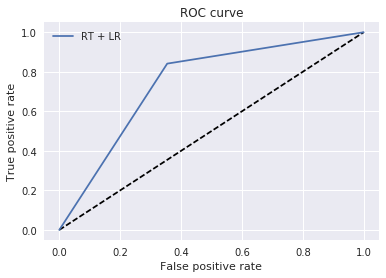

*********************************


0.74333328482790006

In [51]:
complete_report(y_test, model.predict(X_test))

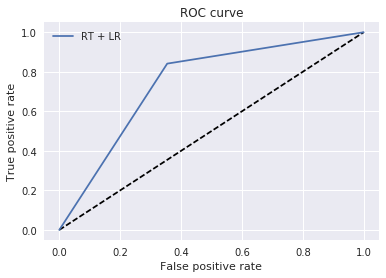

In [52]:
roc_curve_label(y_test, model.predict(X_test))

In [53]:
print(len(df_test))

19918


In [54]:
df_test_group_1 = df_test#[df_test["user_id"].isin(user_for_specific_model)].copy(deep=True)
p = model.predict_proba(df_test_group_1[features])
p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

0    0.400
1    0.700
2    0.200
3    0.800
4    0.225
Name: prediction, dtype: float64

In [55]:
print(len(df_test))

13222


In [56]:
df_train = pd.read_csv("../data/train_data3.csv")
df_test = pd.read_csv("../data/test_data3.csv")

df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.columns.values
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")


### select users for general
df_train = df_train[df_train["user_id"].isin(user_for_general_model)]
df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

features = [col for col in df_train.columns.values if col != target]
features

['Unnamed: 0',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [57]:
len(df_test)

6696

In [58]:
features = ['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

23 selected variables from 29, 79.31%
['genre_id', 'media_id', 'context_type', 'listen_type', 'user_id', 'user_age', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_6', 'ts_listen_PERIOD_OF_DAY_1', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']


In [60]:
model = RandomForestClassifier(n_jobs=4)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.77051353614289697

In [61]:
df_test[df_test["user_id"].isin(user_for_general_model)].head()

,Unnamed: 0,sample_id,genre_id,media_id,context_type,media_duration,listen_type,user_id,user_age,diff_ts_listen_AND_release_date_D,...,user_age_group_2,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3


In [62]:
df_test_group_2 = df_test #[df_test["user_id"].isin(user_for_general_model)].copy(deep=True)
p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]
df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

0     1.0
6     0.0
8     0.5
14    0.6
15    1.0
Name: prediction, dtype: float64

In [63]:
df_test_group_2

,Unnamed: 0,sample_id,genre_id,media_id,context_type,media_duration,listen_type,user_id,user_age,diff_ts_listen_AND_release_date_D,...,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3,prediction
0,0,0,0.583890,0.647680,0.546746,9.0,0.542075,1.000000,30,5139.0,...,0,1,0,0,0,0,1,0,0,1.0
6,6,6,0.627204,0.400000,0.546746,4.0,0.542075,0.090909,21,11293.0,...,0,0,1,0,0,0,0,0,0,0.0
8,8,8,0.578514,0.800000,0.546746,3.0,0.542075,0.315789,23,5012.0,...,0,1,0,0,0,0,1,0,0,0.5
14,14,14,0.670330,0.647680,0.468350,3.0,0.542075,0.666667,20,2411.0,...,0,0,0,0,1,0,0,0,1,0.6
15,15,15,0.700000,1.000000,0.546746,9.0,0.542075,0.968750,29,4009.0,...,0,0,0,0,1,0,0,0,0,1.0
16,16,16,0.631575,0.500000,0.468350,3.0,0.542075,0.611111,18,2304.0,...,1,0,0,0,0,0,1,0,0,0.2
19,19,19,0.677729,0.800000,0.546746,5.0,0.542075,0.444444,24,2076.0,...,1,0,0,0,0,0,0,0,0,0.5
25,25,25,0.797753,1.000000,0.546746,4.0,0.542075,0.910112,18,1760.0,...,0,0,0,0,0,0,1,0,0,1.0
29,29,29,0.750000,0.750000,0.546746,3.0,0.542075,0.900000,27,4334.0,...,0,0,0,0,1,0,0,0,0,1.0
33,33,33,0.750000,0.750000,0.546746,3.0,0.542075,0.578947,29,4345.0,...,0,1,0,0,0,0,1,0,0,0.7


In [64]:
df_test = pd.read_csv("../data/test_data3.csv", index_col="user_id")
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_index=True, right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_index=True, right_index=True, how="outer")

In [65]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

13222
6696
19918


In [66]:
#pd.set_option("precision", 10)
df_test_group_2[["user_id", "prediction"]].head()

,user_id,prediction
0,1.000000,1.0
6,0.090909,0.0
8,0.315789,0.5
14,0.666667,0.6
15,0.968750,1.0


In [67]:
df_test.head()

,Unnamed: 0,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,...,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,prediction_x,prediction_y
0,14561,14561,0,2016-12-01 15:49:02,117678828,12219078,1,2015-10-12 00:00:00,0,2,...,12,10,2015,3,1,2,24.860274,8,0.400,1.0
1,6026,6026,0,2016-12-01 15:50:39,103870206,10804138,1,2015-07-16 00:00:00,0,2,...,16,7,2015,3,1,2,25.619178,8,0.700,NaN
2,9627,9627,0,2016-12-01 14:18:35,110692486,11516526,1,2015-12-04 00:00:00,1,2,...,4,12,2015,3,1,0,18.005479,8,0.200,NaN
3,6064,6064,3645,2016-12-01 19:51:14,4628432,425785,1,2009-11-02 00:00:00,0,0,...,2,11,2009,3,2,0,12.915068,7,0.800,NaN
4,8065,8065,14,2016-12-01 03:51:47,71152679,6985314,1,2013-09-30 00:00:00,0,0,...,30,9,2013,3,3,0,15.827397,8,0.225,NaN


In [68]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [69]:
df_test["prediction"].head()

0    1.400
1    0.700
2    0.200
3    0.800
4    0.225
Name: prediction, dtype: float64

In [70]:
df_test["prediction"].values[:5]

array([ 1.4  ,  0.7  ,  0.2  ,  0.8  ,  0.225])

In [71]:
len(df_test)

19918

In [78]:
(df_test["prediction"] > 1.0).sum()

2684

In [75]:
pd.isnull(df_test["prediction_y"]).sum()

0

In [79]:
df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [56]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [54]:
p = model.predict_proba(df_test[features])
p = p[:, 1]
#p = df_test["prediction"].values

In [57]:
build_kaggle_submission(p, "rand_test")

In [198]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1242.442859
3.684862
6.4e-05


### GridSearch and XGBoost

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [0]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

In [0]:
df_train["album_id"].max()

In [0]:
output_array